In [2]:
%matplotlib inline

In [3]:
import numpy as np
import os
import cv2
import time
import random
import torch
import matplotlib.pyplot as plt

In [4]:
import sys
sys.path.append('../')

In [5]:
from dataset import tuSimpleDataset
from torch.utils.data import DataLoader
from model import SegNet

In [6]:
INPUT_CHANNELS = 3
OUTPUT_CHANNELS = 2
BATCH_SIZE = 20
SIZE = [224, 224]

In [7]:
train_path = '/data/tuSimple/train_set/'
test_path = '/data/tuSimple/test_set/'
MODEL_PATH = '../model_best.pth'

In [8]:
test_dataset = tuSimpleDataset(test_path, size=SIZE, train=False)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=8)

In [9]:
model = SegNet(input_ch=INPUT_CHANNELS, output_ch=OUTPUT_CHANNELS).cuda()
model.load_state_dict(torch.load(MODEL_PATH))

In [10]:
model.eval()
imgs = next(iter(test_dataloader))

In [11]:
input_tensor = torch.autograd.Variable(imgs).cuda()
sem_pred, ins_pred = model(input_tensor)

In [20]:
idx = random.randint(0,BATCH_SIZE-1)
# idx = 19

test_img = np.transpose(imgs[idx].cpu().numpy(), (1,2,0))
sem_softmaxed = torch.nn.functional.softmax(sem_pred[idx], dim=1)
ins_softmaxed = torch.nn.functional.softmax(ins_pred[idx], dim=1)
test_sem = sem_softmaxed.cpu().data.numpy()
test_ins = ins_softmaxed.cpu().data.numpy()

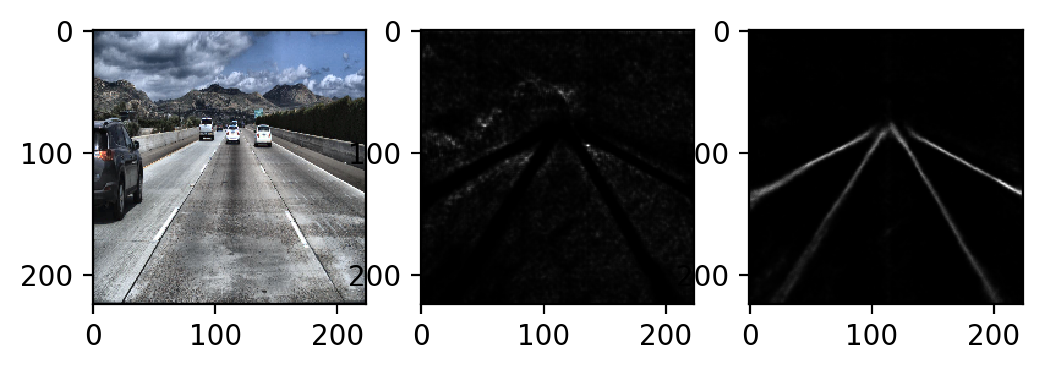

In [24]:
plt.figure(dpi=200)
plt.gray()
plt.subplot(131);plt.imshow(test_img)
plt.subplot(132);plt.imshow(test_sem[0])
plt.subplot(133);plt.imshow(test_sem[1])

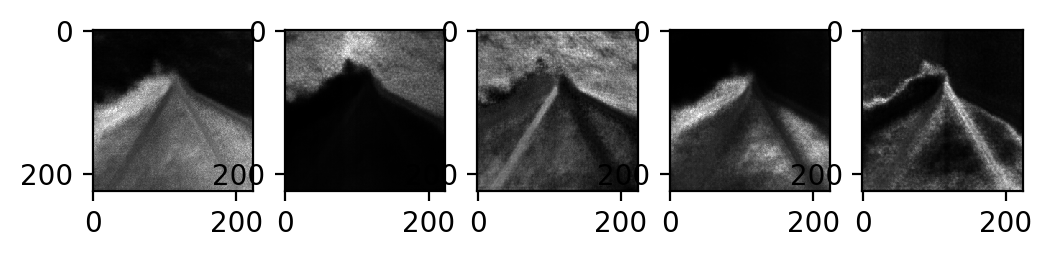

In [25]:
plt.figure(dpi=200)
plt.gray()
plt.subplot(151);plt.imshow(test_ins[0])
plt.subplot(152);plt.imshow(test_ins[1])
plt.subplot(153);plt.imshow(test_ins[2])
plt.subplot(154);plt.imshow(test_ins[3])
plt.subplot(155);plt.imshow(test_ins[4])

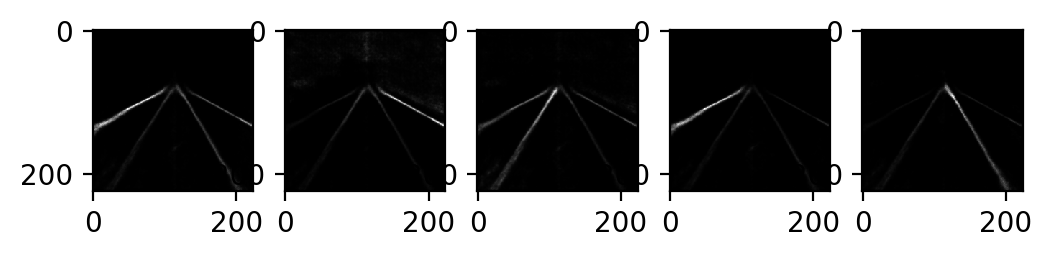

In [26]:
plt.figure(dpi=200)
plt.gray()
plt.subplot(151);plt.imshow(test_ins[0] * test_sem[1])
plt.subplot(152);plt.imshow(test_ins[1] * test_sem[1])
plt.subplot(153);plt.imshow(test_ins[2] * test_sem[1])
plt.subplot(154);plt.imshow(test_ins[3] * test_sem[1])
plt.subplot(155);plt.imshow(test_ins[4] * test_sem[1])